In [20]:
# pip install neattext

In [21]:
# Load EDA Pkgs
import pandas as pd
import seaborn as sns
import neattext as nfx

# Load ML Pkgs 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.dummy import DummyClassifier
import joblib


In [22]:
story = pd.read_csv('./data/Historia de vida de Jose - Historia.csv')
story.head()

,name,tag
0,2.1. Jose Lopez - Infancia,#2. mi infancia
1,2.7. Barrio de mi infancia,#2. mi infancia
2,2.2. Abuela Ernestina Pujol,#2. mi infancia
3,2.4. Juguetes preferidos auto,#2. mi infancia
4,2.6. Primera Comunión,#2. mi infancia


In [23]:
# Clean the text
story['name'] = story['name'].apply(lambda x: nfx.remove_stopwords(str(x).lower()))

<AxesSubplot:xlabel='tag'>

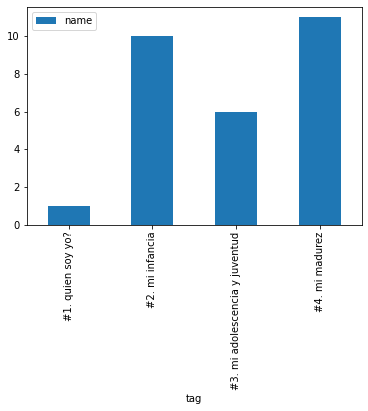

In [24]:
story.groupby('tag').count().plot.bar()

In [25]:
story['tag'].value_counts()

#4. mi madurez                    11
#2. mi infancia                   10
#3. mi adolescencia y juventud     6
#1. quien soy yo?                  1
Name: tag, dtype: int64

<AxesSubplot:xlabel='tag', ylabel='count'>

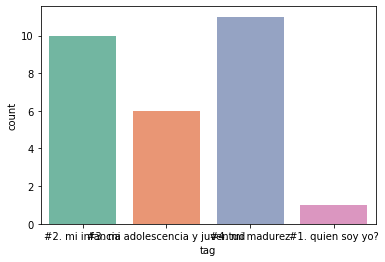

In [26]:
sns.countplot(x='tag', data=story, orient='h', palette="Set2")

### Building our model using Pipeline Approach

In [27]:
# Make a Pipeline
pipe_base = Pipeline(steps=[('cv',CountVectorizer()),('dummy',DummyClassifier())])
pipe_nb = Pipeline(steps=[('cv',CountVectorizer()),('nb',MultinomialNB())])
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_dt = Pipeline(steps=[('cv',CountVectorizer()),('nb',DecisionTreeClassifier())])


# Base Model: accuracy

In [28]:
# Features & labels
Xfeatures = story['name']
ylabels = story['tag'] 

In [29]:
# Split Dataset
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state= 42)

In [30]:
# Base Model: accuracy
pipe_base.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('dummy', DummyClassifier())])

In [31]:
pipe_base.score(x_test,y_test) 

0.3333333333333333

In [32]:
# Build our actual Models
pipe_nb.fit(x_train,y_train)
pipe_dt.fit(x_train,y_train)
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [33]:
pipe_nb.score(x_test,y_test)

0.4444444444444444

In [34]:
pipe_dt.score(x_test,y_test)

0.4444444444444444

In [35]:
pipe_lr.score(x_test,y_test)

0.4444444444444444

## Evaluate

In [36]:
y_pred_base = pipe_base.predict(x_test)
y_pred_base

array(['#2. mi infancia', '#2. mi infancia', '#2. mi infancia',
       '#2. mi infancia', '#2. mi infancia', '#2. mi infancia',
       '#2. mi infancia', '#2. mi infancia', '#2. mi infancia'],
      dtype='<U15')

In [37]:
# Report 
print(classification_report(y_test,y_pred_base,zero_division=0))

                                precision    recall  f1-score   support

               #2. mi infancia       0.33      1.00      0.50         3
#3. mi adolescencia y juventud       0.00      0.00      0.00         2
                #4. mi madurez       0.00      0.00      0.00         4

                      accuracy                           0.33         9
                     macro avg       0.11      0.33      0.17         9
                  weighted avg       0.11      0.33      0.17         9



In [38]:
y_pred_nb = pipe_nb.predict(x_test)
y_pred_nb

array(['#2. mi infancia', '#3. mi adolescencia y juventud',
       '#2. mi infancia', '#3. mi adolescencia y juventud',
       '#4. mi madurez', '#4. mi madurez', '#2. mi infancia',
       '#4. mi madurez', '#3. mi adolescencia y juventud'], dtype='<U30')

In [39]:
print (classification_report(y_test,y_pred_nb,zero_division=0))

                                precision    recall  f1-score   support

               #2. mi infancia       0.67      0.67      0.67         3
#3. mi adolescencia y juventud       0.33      0.50      0.40         2
                #4. mi madurez       0.33      0.25      0.29         4

                      accuracy                           0.44         9
                     macro avg       0.44      0.47      0.45         9
                  weighted avg       0.44      0.44      0.44         9



In [40]:
y_pred_lr = pipe_lr.predict(x_test)
y_pred_lr

array(['#2. mi infancia', '#2. mi infancia', '#2. mi infancia',
       '#2. mi infancia', '#2. mi infancia', '#4. mi madurez',
       '#2. mi infancia', '#4. mi madurez', '#4. mi madurez'],
      dtype=object)

In [41]:
print(classification_report(y_test,y_pred_lr,zero_division=0))

                                precision    recall  f1-score   support

               #2. mi infancia       0.50      1.00      0.67         3
#3. mi adolescencia y juventud       0.00      0.00      0.00         2
                #4. mi madurez       0.33      0.25      0.29         4

                      accuracy                           0.44         9
                     macro avg       0.28      0.42      0.32         9
                  weighted avg       0.31      0.44      0.35         9



In [42]:
y_pred_dt = pipe_dt.predict(x_test)
y_pred_dt

array(['#2. mi infancia', '#3. mi adolescencia y juventud',
       '#2. mi infancia', '#3. mi adolescencia y juventud',
       '#4. mi madurez', '#4. mi madurez', '#2. mi infancia',
       '#4. mi madurez', '#3. mi adolescencia y juventud'], dtype=object)

In [43]:
print(classification_report(y_test,y_pred_dt,zero_division=0))

                                precision    recall  f1-score   support

               #2. mi infancia       0.67      0.67      0.67         3
#3. mi adolescencia y juventud       0.33      0.50      0.40         2
                #4. mi madurez       0.33      0.25      0.29         4

                      accuracy                           0.44         9
                     macro avg       0.44      0.47      0.45         9
                  weighted avg       0.44      0.44      0.44         9



In [44]:
# We use all dataset, because it is little data

# Load dataset
story = pd.read_csv('./data/Historia de vida de Jose - Historia.csv')
# Clean the text
story['name'] = story['name'].apply(lambda x: nfx.remove_stopwords(str(x).lower()))
# Features & labels
Xfeatures = story['name']
ylabels = story['tag'] 

# Train the model
pipe_lr.fit(Xfeatures,ylabels)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [51]:
ex = ['historia de amigos']
print (pipe_dt.predict(ex))
print (pipe_dt.classes_)
print (pipe_dt.predict_proba(ex))

['#3. mi adolescencia y juventud']
['#1. quien soy yo?' '#2. mi infancia' '#3. mi adolescencia y juventud'
 '#4. mi madurez']
[[0. 0. 1. 0.]]


In [52]:
import json
# json.dumps(pipe_lr.classes_.tolist())

pred = {}
itemProb = 0
auxPred = [pipe_lr.classes_.tolist(),pipe_lr.predict_proba(ex)[0].tolist()]
for itemPredLabel  in auxPred[0]:
    pred[itemPredLabel]= auxPred[1][itemProb]
    itemProb += 1


json.dumps(dict(sorted(pred.items(), key=lambda item: item[1],reverse=True)))




'{"#4. mi madurez": 0.44971289438718315, "#2. mi infancia": 0.28996879271499304, "#3. mi adolescencia y juventud": 0.23245110713901024, "#1. quien soy yo?": 0.027867205758813574}'

In [53]:
dict(sorted(pred.items(), key=lambda item: item[1],reverse=True))

{'#4. mi madurez': 0.44971289438718315,
 '#2. mi infancia': 0.28996879271499304,
 '#3. mi adolescencia y juventud': 0.23245110713901024,
 '#1. quien soy yo?': 0.027867205758813574}

In [54]:
#save model
filename='../model/classifications_v1.sav'
joblib.dump(pipe_lr, filename)


['../model/classifications_v1.sav']

In [55]:
# load the model from disk
filename='../model/classifications_v1.sav'
loaded_model = joblib.load(filename)
result = loaded_model.score(x_train,y_train)
print(result)

0.9473684210526315


In [56]:
ex = 'dibujo de un leon'
print(loaded_model.predict([ex]))
print (loaded_model.classes_)
print (loaded_model.predict_proba([ex]))

['#4. mi madurez']
['#1. quien soy yo?' '#2. mi infancia' '#3. mi adolescencia y juventud'
 '#4. mi madurez']
[[0.02922931 0.34513854 0.25221356 0.37341858]]
